# LINEAR REGRESSION ASSIGNMENT


# Importing libraries and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
bike_df = pd.read_csv("day.csv")

# Understanding data

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA PREPERATION

In [7]:
bike_df.drop(['instant'],axis=1,inplace=True)

In [8]:
bike_df.drop(['dteday'],axis=1,inplace=True)

In [9]:
bike_df.drop(['casual'],axis=1,inplace=True)

In [10]:
bike_df.drop(['registered'],axis=1,inplace=True)

# Dealing With Categorical Variables

In [11]:
non_binary_cat_vars =  ['season','mnth','weekday','weathersit']

In [12]:
bike_df['season'] = bike_df['season'].map({1:'Spring',2:'Summer', 3:'Fall', 4:'Winter'})

In [13]:
bike_df['mnth'] = bike_df['mnth'].map({1:'January',2:'February', 3:'March', 4:'April',5:'May',6:'June',7:'July'
                                       ,8:'August',9:'September',10:'October',11:'November',12:'December'})

In [14]:
bike_df['weekday'] = bike_df['weekday'].map({1:'Monday',2:'Tuesday', 3:'Wednesday', 4:'Thursday',
                                             5:'Friday',6:'Saturday',7:'Sunday'})

In [15]:
bike_df['weathersit'] = bike_df['weathersit'].map({1:'Clear to Partly Cloudy',2:'Misty and Cloudy', 
                                                   3:'Light Rain or Snow', 4:'Heavy Rain or Snow'})

In [16]:
dummy_1 = pd.get_dummies(bike_df['season'], drop_first = True)
bike_df = pd.concat([bike_df, dummy_1], axis = 1)


In [17]:
dummy_2 = pd.get_dummies(bike_df['mnth'], drop_first = True)
bike_df = pd.concat([bike_df, dummy_2], axis = 1)


In [18]:
dummy_3 = pd.get_dummies(bike_df['weekday'], drop_first = True)
bike_df = pd.concat([bike_df, dummy_3], axis = 1)


In [19]:
dummy_4 = pd.get_dummies(bike_df['weathersit'], drop_first = True)
bike_df = pd.concat([bike_df, dummy_4], axis = 1)


In [20]:
bike_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Rain or Snow,Misty and Cloudy
0,Spring,0,January,0,Saturday,0,Misty and Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,Spring,0,January,0,NaN,0,Misty and Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,1
2,Spring,0,January,0,Monday,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,...,0,0,0,1,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,Thursday,1,Misty and Cloudy,10.420847,11.33210,65.2917,...,0,0,0,0,0,1,0,0,0,1
726,Spring,1,December,0,Friday,1,Misty and Cloudy,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,0,1
727,Spring,1,December,0,Saturday,0,Misty and Cloudy,10.386653,12.12000,75.2917,...,0,0,0,0,1,0,0,0,0,1
728,Spring,1,December,0,NaN,0,Clear to Partly Cloudy,10.489153,11.58500,48.3333,...,0,0,0,0,0,0,0,0,0,0


# OUTLIER DETECTION

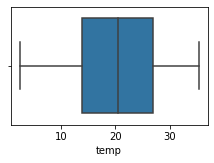

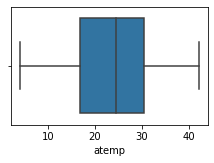

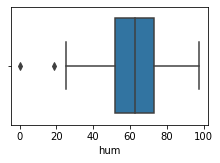

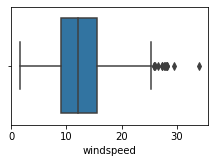

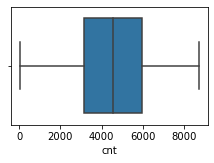

In [21]:
plt.figure(1, figsize=(12,10))

plt.subplot(4,3,1)
sns.boxplot(bike_df['temp'])

plt.figure(2, figsize=(12,10))

plt.subplot(4,3,2)
sns.boxplot(bike_df['atemp'])

plt.figure(3, figsize=(12,10))

plt.subplot(4,3,3)
sns.boxplot(bike_df['hum'])

plt.figure(4, figsize=(12,10))

plt.subplot(4,3,4)
sns.boxplot(bike_df['windspeed'])

plt.figure(5, figsize=(12,10))

plt.subplot(4,3,5)
sns.boxplot(bike_df['cnt'])




plt.show()

# 'hum'and 'windspeed'  have outliers

# Outlier treatment of 'hum'

In [22]:
bike_df['hum'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [23]:
q1 = 52.00
q3 = 72.99
iqr = q3 - q1
iqr

20.989999999999995

In [24]:
lower_bound = q1 + 1.5*iqr
lower_bound

83.48499999999999

In [25]:
for i in bike_df['hum']:
    if i<lower_bound:
        i=lower_bound
print(bike_df['hum'])

0      80.5833
1      69.6087
2      43.7273
3      59.0435
4      43.6957
        ...   
725    65.2917
726    59.0000
727    75.2917
728    48.3333
729    57.7500
Name: hum, Length: 730, dtype: float64


# Outlier treatment of 'windspeed'


In [26]:
bike_df['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [27]:
q1 = 9.04
q3 = 15.62
iqr = q3-q1
upper_bound = q3 - 1.5*iqr
upper_bound

5.749999999999998

In [28]:
for i in bike_df['windspeed']:
    if i>upper_bound:
        i=upper_bound

# UNIVARIATE ANALYSIS

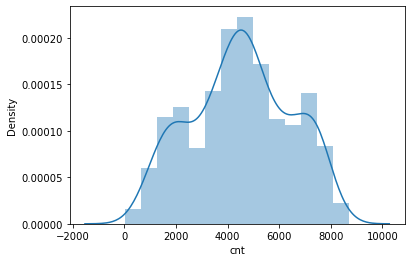

In [29]:
sns.distplot(bike_df['cnt'])
plt.show()

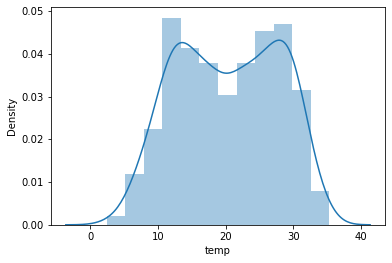

In [30]:
sns.distplot(bike_df['temp'])
plt.show()

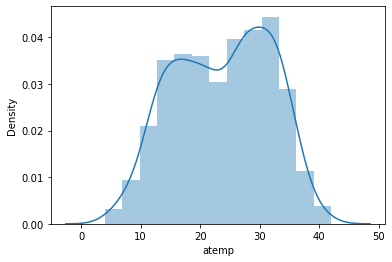

In [31]:
sns.distplot(bike_df['atemp'])
plt.show()

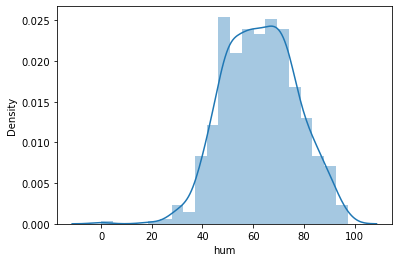

In [32]:
sns.distplot(bike_df['hum'])
plt.show()

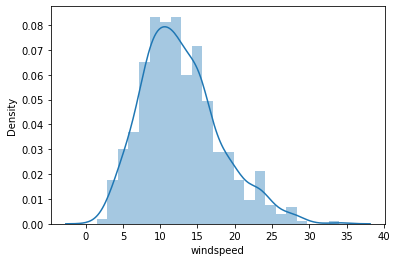

In [33]:
sns.distplot(bike_df['windspeed'])
plt.show()

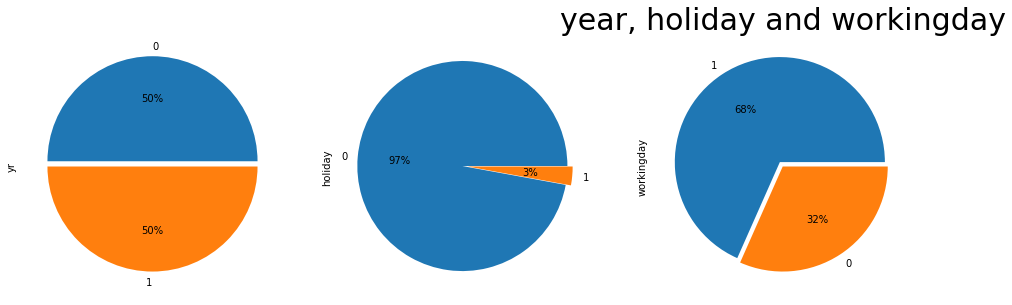

In [34]:
plt.figure(figsize=[16,15])
plt.subplot(131)
bike_df['yr'].value_counts(normalize=True).plot.pie(explode=(0.05,0),autopct="%1.0f%%")
plt.subplot(132)
bike_df['holiday'].value_counts(normalize=True).plot.pie(explode=(0.05,0),autopct="%1.0f%%")
plt.subplot(133)
bike_df['workingday'].value_counts(normalize=True).plot.pie(explode=(0.05,0),autopct="%1.0f%%")
plt.title('year, holiday and workingday',fontsize=30)
plt.show()


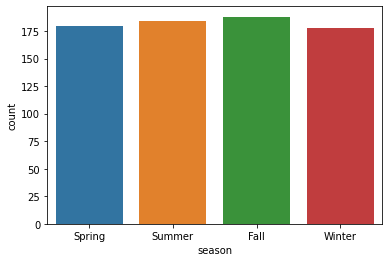

In [35]:
sns.countplot(bike_df['season'])
plt.show()

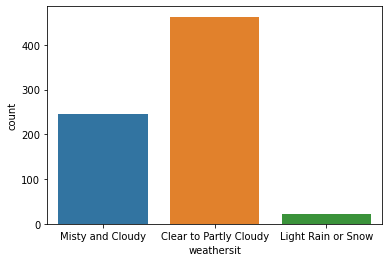

In [36]:
sns.countplot(bike_df['weathersit'])
plt.show()

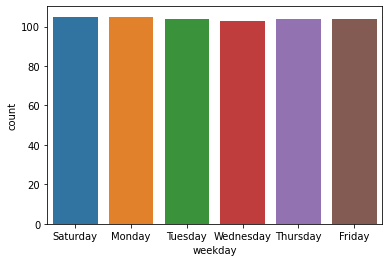

In [37]:
sns.countplot(bike_df['weekday'])
plt.show()

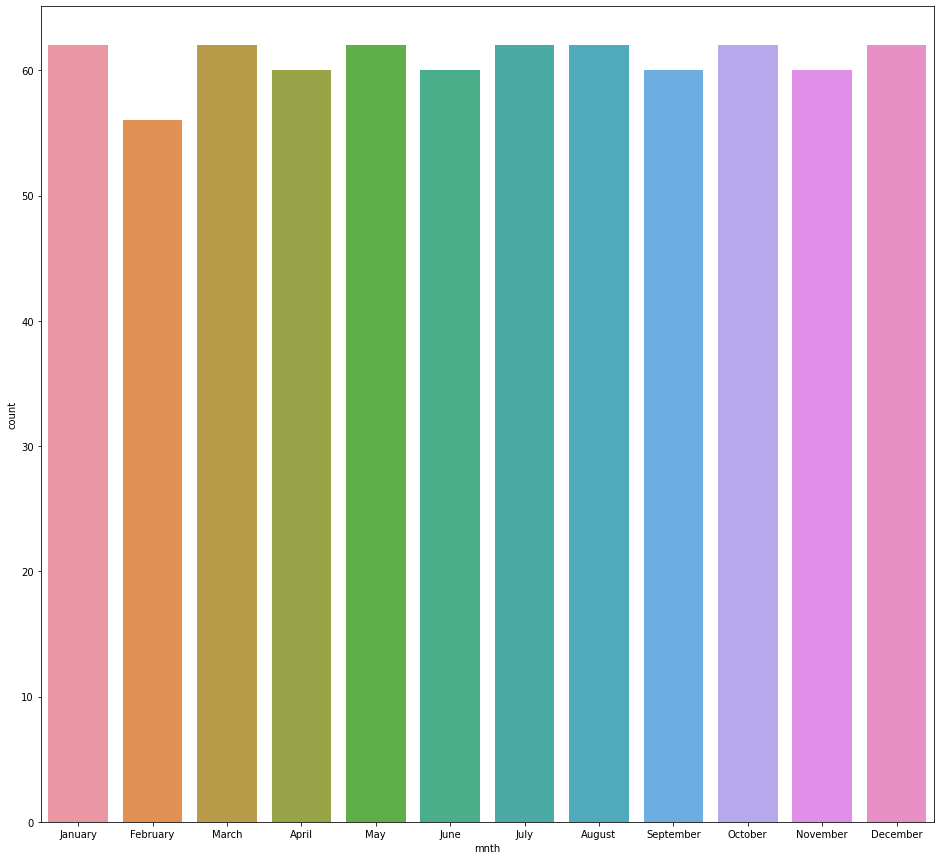

In [38]:
plt.figure(figsize=[16,15])
sns.countplot(bike_df['mnth'])
plt.show()

# BIVARIATE ANALYSIS

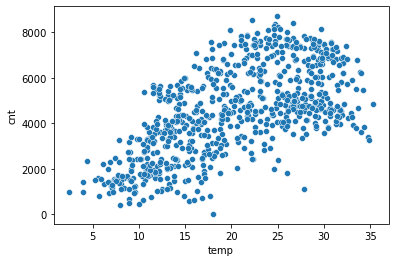

In [39]:
sns.scatterplot(bike_df['temp'],bike_df['cnt'],)
plt.show()

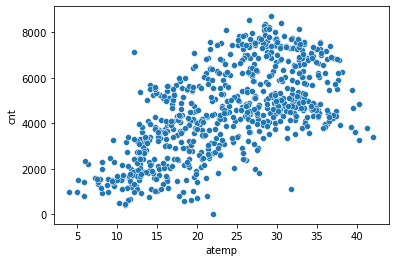

In [40]:
sns.scatterplot(bike_df['atemp'],bike_df['cnt'],)
plt.show()

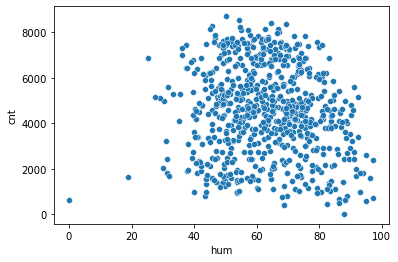

In [41]:
sns.scatterplot(bike_df['hum'],bike_df['cnt'],)
plt.show()

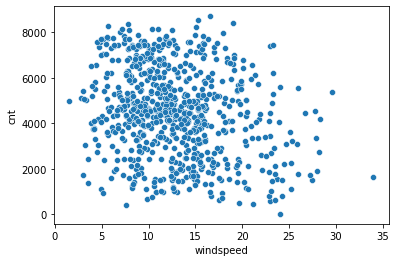

In [42]:
sns.scatterplot(bike_df['windspeed'],bike_df['cnt'],)
plt.show()

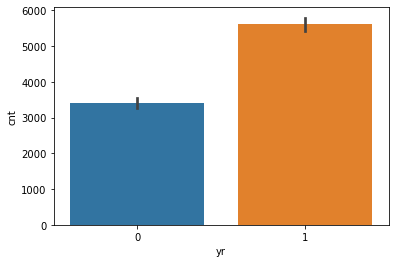

In [43]:
sns.barplot(bike_df['yr'],bike_df['cnt'],)
plt.show()

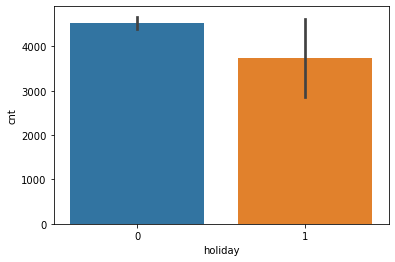

In [44]:
sns.barplot(bike_df['holiday'],bike_df['cnt'],)
plt.show()

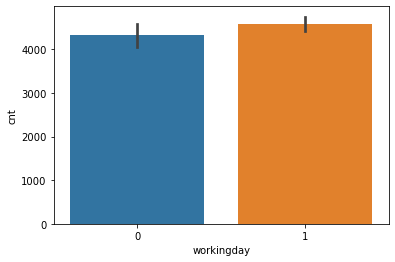

In [45]:
sns.barplot(bike_df['workingday'],bike_df['cnt'],)
plt.show()

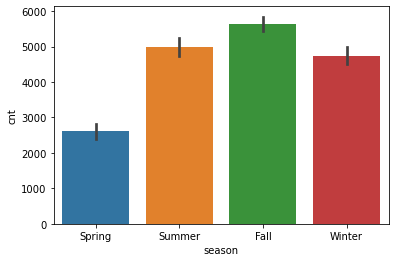

In [46]:
sns.barplot(bike_df['season'],bike_df['cnt'],)
plt.show()

# Huge clients are there during 'Fall' and 'Summer'

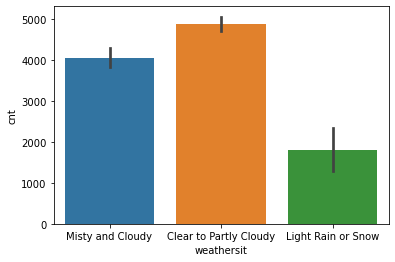

In [47]:
sns.barplot(bike_df['weathersit'],bike_df['cnt'],)
plt.show()

# large number of clients are coming during ' Clear to Partly Cloudy'

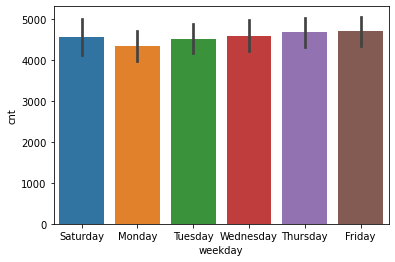

In [48]:
sns.barplot(bike_df['weekday'],bike_df['cnt'],)
plt.show()

# Majority of clients come on 'Friday' and 'Thursday'


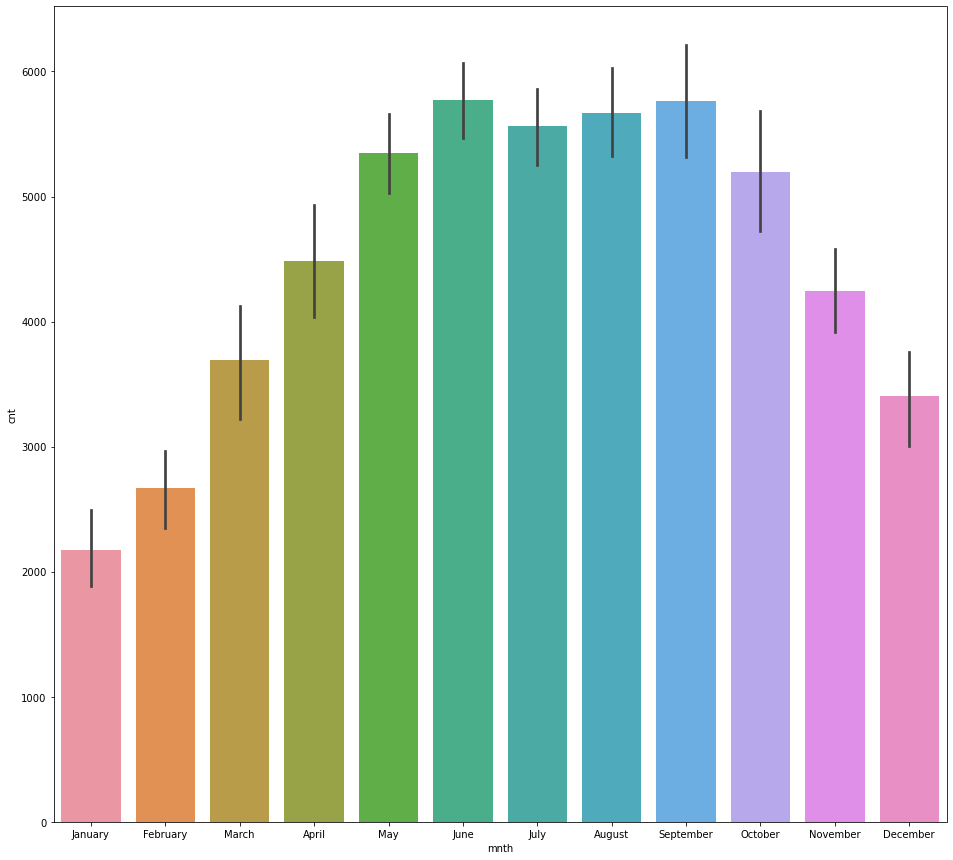

In [49]:
plt.figure(figsize=[16,15])
sns.barplot(bike_df['mnth'],bike_df['cnt'],)
plt.show()

# Largest number of clients were during 'September' and 'June'

# MULTIVARIATE ANALYSIS

<Figure size 2160x2160 with 0 Axes>

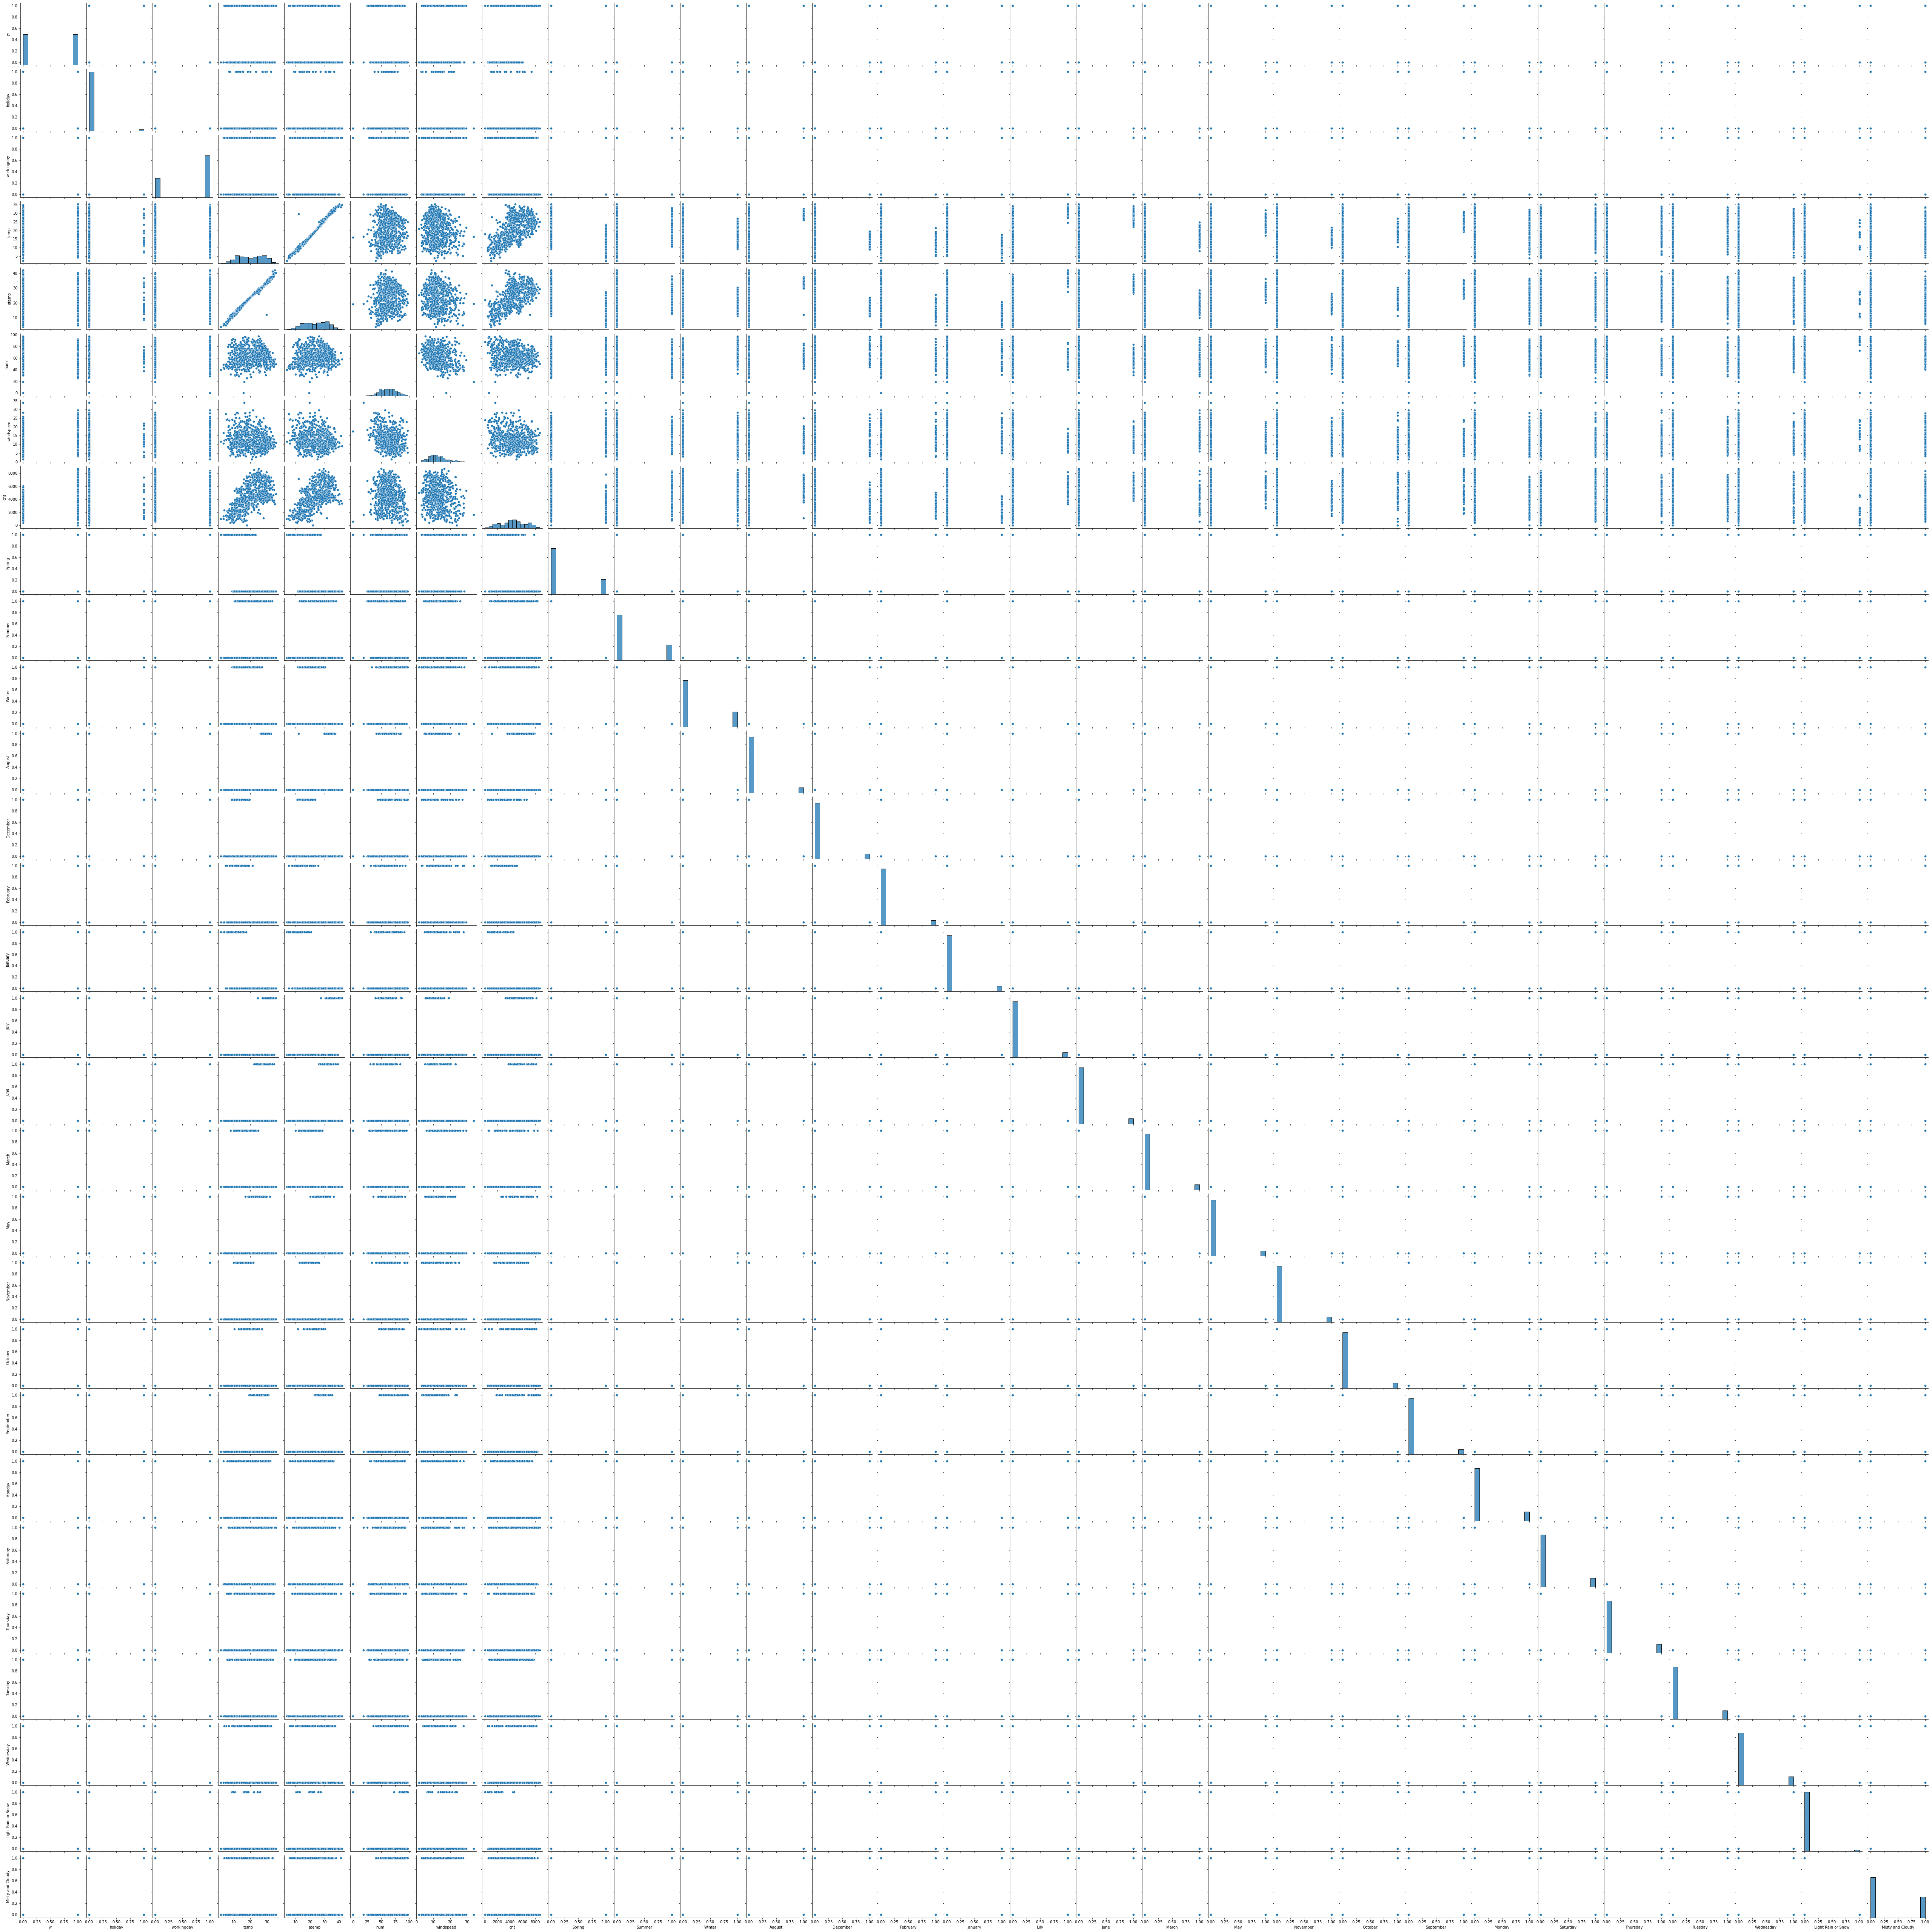

In [71]:
plt.figure(1, figsize=(30,30))
sns.pairplot(bike_df)
plt.show()

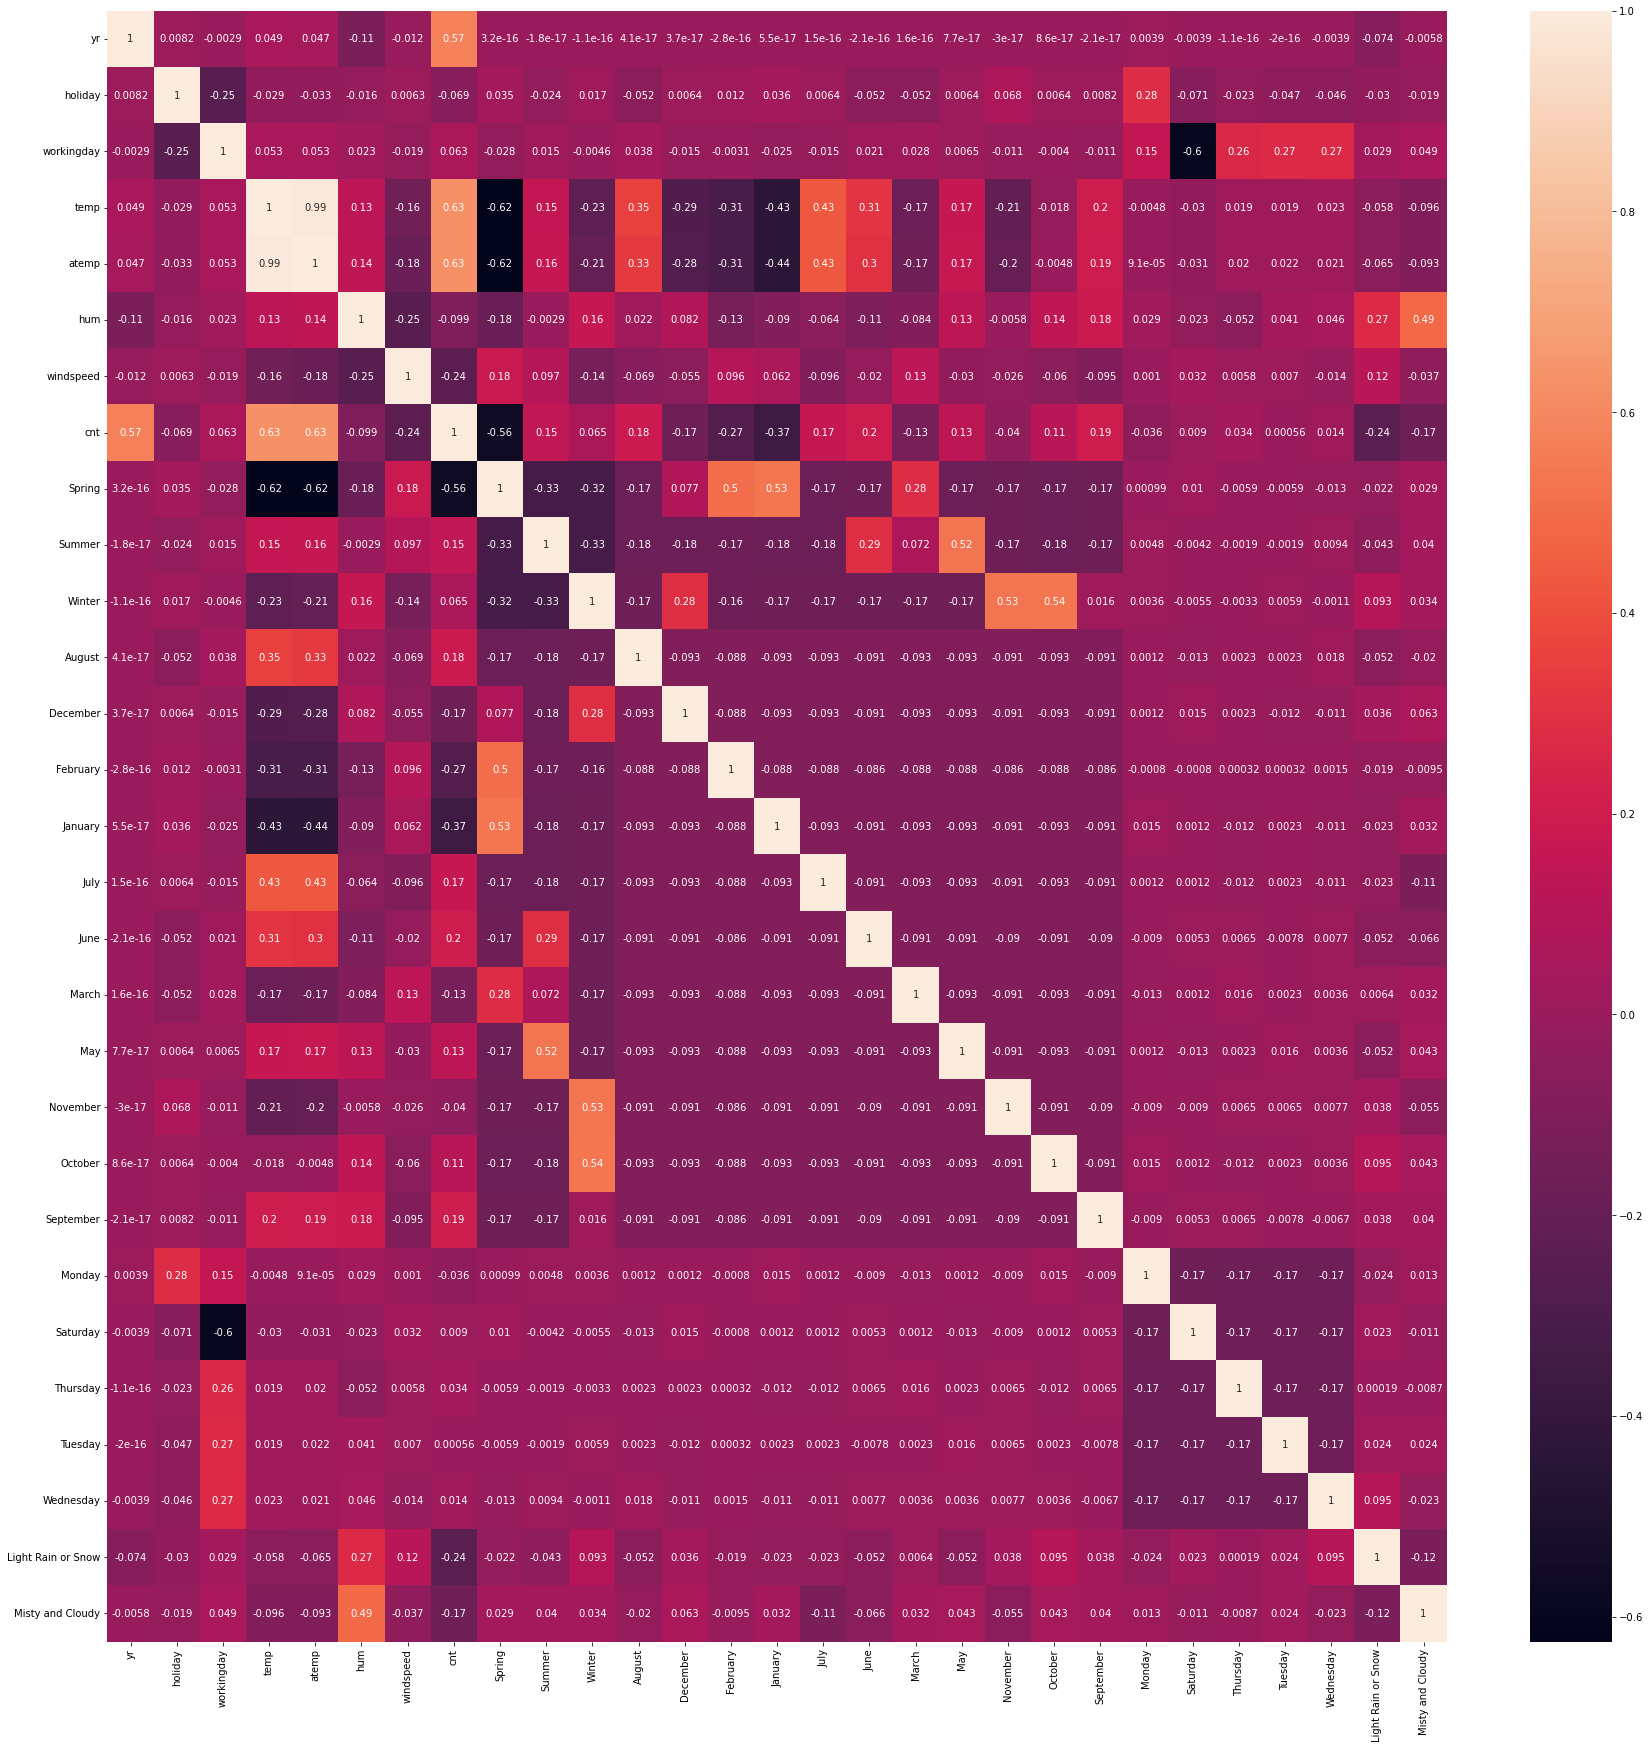

In [50]:
plt.figure(1, figsize=(30,30))
sns.heatmap(bike_df.corr(),annot = True)
plt.show()

# MODEL BUILDING

# Splitting data for training and testing

In [51]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(bike_df,train_size = 0.7,test_size =0.3,random_state =100)

# SCALING

In [52]:
from sklearn.preprocessing import MinMaxScaler
a = MinMaxScaler()
cont_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[cont_vars]=a.fit_transform(df_train[cont_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Rain or Snow,Misty and Cloudy
653,Winter,1,October,0,Tuesday,1,Clear to Partly Cloudy,0.509887,0.501133,0.575354,...,0,1,0,0,0,0,1,0,0,0
576,Fall,1,July,0,Tuesday,1,Clear to Partly Cloudy,0.815169,0.766351,0.725633,...,0,0,0,0,0,0,1,0,0,0
426,Spring,1,March,0,Saturday,0,Misty and Cloudy,0.442393,0.438975,0.640189,...,0,0,0,0,1,0,0,0,0,1
728,Spring,1,December,0,NaN,0,Clear to Partly Cloudy,0.245101,0.200348,0.498067,...,0,0,0,0,0,0,0,0,0,0
482,Summer,1,April,0,Saturday,0,Misty and Cloudy,0.395666,0.391735,0.504508,...,0,0,0,0,1,0,0,0,0,1


# TRAINING DATA

In [53]:
x_train = df_train
y_train = df_train.pop('cnt')

# FEATURE SELECTION BY P-VALUE AND  VIF

In [54]:
import statsmodels.api as sm
x_train_m = sm.add_constant(x_train[['yr','temp', 'atemp', 'hum', 'windspeed','Spring','Summer','Winter','January','February','March','May','June','July','August', 'September','October','November','December','Monday','Tuesday','Wednesday','Thursday','Saturday','holiday','Misty and Cloudy','Light Rain or Snow','workingday' ]])
lr = sm.OLS(y_train,x_train_m).fit()
lr.params

const                 0.286763
yr                    0.232208
temp                  0.401322
atemp                 0.050628
hum                  -0.151812
windspeed            -0.184388
Spring               -0.048580
Summer                0.038216
Winter                0.105387
January              -0.062565
February             -0.032176
March                 0.001288
May                   0.024691
June                 -0.001704
July                 -0.039277
August                0.016076
September             0.081806
October               0.007695
November             -0.041783
December             -0.045572
Monday               -0.021502
Tuesday              -0.019308
Wednesday            -0.005733
Thursday             -0.009750
Saturday              0.054533
holiday              -0.030838
Misty and Cloudy     -0.061030
Light Rain or Snow   -0.256697
workingday            0.055435
dtype: float64

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 09 May 2023   Prob (F-statistic):          8.42e-181
Time:                        08:51:07   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2868      0

# The p-value of 'atemp','Spring','Summer',,'February','March','June','August','October', 'November','December','Monday','Tuesday','Wednesday','Thursday'  and 'holiday'are greater than 50% so lets drop them

In [56]:
x_train_2 = sm.add_constant(x_train[['yr','temp','hum','windspeed','Winter','September','Saturday','Misty and Cloudy','Light Rain or Snow','workingday']])
lr_2 = sm.OLS(y_train,x_train_2).fit()
lr_2.params

const                 0.169541
yr                    0.229515
temp                  0.588354
hum                  -0.142311
windspeed            -0.163206
Winter                0.113110
September             0.074726
Saturday              0.063712
Misty and Cloudy     -0.052946
Light Rain or Snow   -0.249135
workingday            0.055847
dtype: float64

In [57]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.10e-176
Time:                        08:51:08   Log-Likelihood:                 471.13
No. Observations:                 510   AIC:                            -920.3
Df Residuals:                     499   BIC:                            -873.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1695      0

# The value of R2 and adjusted R2 is greater than 80% and value of p-value less than 50%

In [58]:
x_train_3 = sm.add_constant(x_train[['yr','temp','hum','windspeed','Winter','September','Saturday','Misty and Cloudy','Light Rain or Snow','workingday']])
lr_3 = sm.OLS(y_train,x_train_3).fit()
lr_3.params

const                 0.169541
yr                    0.229515
temp                  0.588354
hum                  -0.142311
windspeed            -0.163206
Winter                0.113110
September             0.074726
Saturday              0.063712
Misty and Cloudy     -0.052946
Light Rain or Snow   -0.249135
workingday            0.055847
dtype: float64

In [59]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.10e-176
Time:                        08:51:08   Log-Likelihood:                 471.13
No. Observations:                 510   AIC:                            -920.3
Df Residuals:                     499   BIC:                            -873.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1695      0

# The value of R2 and adjusted R2 is greater than 80% and value of p-value less than 50%# p-value of February greater than 50%  so drop it

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train_3.columns
vif['VIF'] = [variance_inflation_factor(x_train_3.values,i) for i in range(x_train_3.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.115727
3,hum,1.865182
10,workingday,1.649067
7,Saturday,1.641279
8,Misty and Cloudy,1.559094
2,temp,1.258265
9,Light Rain or Snow,1.239126
4,windspeed,1.169025
5,Winter,1.141079
6,September,1.065864


# There is no multicollinearity 

In [61]:
x_train_4 = sm.add_constant(x_train[['yr','temp','hum','windspeed','Summer','Winter','September','Saturday','Misty and Cloudy','Light Rain or Snow','workingday']])
lr_4 = sm.OLS(y_train,x_train_4).fit()
lr_4.params

const                 0.169821
yr                    0.229437
temp                  0.570880
hum                  -0.161282
windspeed            -0.186078
Summer                0.089914
Winter                0.140652
September             0.102541
Saturday              0.063047
Misty and Cloudy     -0.055314
Light Rain or Snow   -0.243890
workingday            0.053557
dtype: float64

In [62]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.89e-191
Time:                        08:51:08   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1698      0

# R2 and adjusted R2 greater than 80% and p-value of all variables less than 50% and no multicollinearity

# RESIDUAL ANALYSIS

In [63]:
y_train_cnt = lr_4.predict(x_train_4)

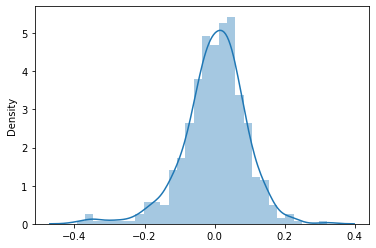

In [64]:
sns.distplot((y_train - y_train_cnt))
plt.show()

# The residuals are normally distributed

# R2 and adjusted R2 greater than 80% and p-value of all variables less than 50% and no multicollinearity and the residuals are normally distributed hence all the assumptions of linear regression are satisfied.

# TESTING DATA

In [65]:
cont_vars =  ['temp', 'atemp', 'hum', 'windspeed']
df_test[cont_vars]=a.fit_transform(df_test[cont_vars])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Rain or Snow,Misty and Cloudy
184,Fall,0,July,1,Monday,0,Misty and Cloudy,0.837241,0.778767,0.534223,...,0,0,0,1,0,0,0,0,0,1
535,Summer,1,June,0,Wednesday,1,Clear to Partly Cloudy,0.911423,0.855132,0.470417,...,0,0,0,0,0,0,0,1,0,0
299,Winter,0,October,0,Thursday,1,Misty and Cloudy,0.496221,0.492359,0.777843,...,0,1,0,0,0,1,0,0,0,1
221,Fall,0,August,0,Wednesday,1,Clear to Partly Cloudy,0.890387,0.805661,0.236659,...,0,0,0,0,0,0,0,1,0,0
152,Summer,0,June,0,Thursday,1,Clear to Partly Cloudy,0.821739,0.749249,0.070765,...,0,0,0,0,0,1,0,0,0,0


In [66]:
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
import statsmodels.api as sm


X_test_n = sm.add_constant(X_test[['yr','temp','hum','windspeed','Winter','September','Saturday','Misty and Cloudy','Light Rain or Snow','workingday']])
                                     
        
lr_n = sm.OLS(y_test,X_test_n).fit()
lr_n.params


const                 1432.225706
yr                    1945.549212
temp                  5001.808216
hum                  -1441.886832
windspeed             -576.995637
Winter                1167.025627
September              586.765830
Saturday               495.153171
Misty and Cloudy      -222.856287
Light Rain or Snow   -1326.458916
workingday             215.801133
dtype: float64

In [68]:
print(lr_n.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.02e-65
Time:                        08:51:08   Log-Likelihood:                -1790.5
No. Observations:                 219   AIC:                             3603.
Df Residuals:                     208   BIC:                             3640.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1432.2257    346

the p-value of windspeed,misty and cloudy and working day greater than 50% so dropping it also dropping saturday since it can affect value of R2 and adjusted R2

In [69]:
X_test_r = sm.add_constant(X_test[['yr','temp','hum','Winter','September','Light Rain or Snow']])
                                     
        
lr_r = sm.OLS(y_test,X_test_r).fit()
lr_r.params


const                 1328.105640
yr                    1949.188617
temp                  5146.588856
hum                  -1640.541264
Winter                1249.416905
September              577.678442
Light Rain or Snow   -1232.354105
dtype: float64

In [70]:
print(lr_r.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.24e-67
Time:                        08:51:08   Log-Likelihood:                -1795.9
No. Observations:                 219   AIC:                             3606.
Df Residuals:                     212   BIC:                             3629.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1328.1056    234

# R2 and adjusted R2 greater than 75% and p-value of all variables less than 50% 

# Therefore the linear regression equation is

# cnt =1328.10+ 1949.18*yr+5146.58*temp-1640.54hum-1249.41*winter+ 577.67*September-1232.35*Light Rain or Snow

# CONCLUSION

# Thus the factors affecting the demand of BoomBikes bike sharing company in the US are year,temp,hum,season,month,weather condition.

1.When all variables are kept constant the demand is 1328.10units.


2.With each passing year demand is expected to rise 1949.18units.


3.Demand will rise 5146.58 times with one unit rise in temperature.


4.With each unit rise in humidity the demand will fall 1640.54 units.


5.Demand falls 1249.41 times during winter season.


6.Demand increases by 577.67 units during the month of September.


7.Demand falls by 1232.25 units during light rain or snow.


# Thus in short number of clients are maximum during 'September'.




# Suggestions

1.Reach out to more clients during September through campaigns.

2.Give special offers during the month of September.


#                                                    # THANK YOU